In [1]:
#Authors: Shane Grigsby <refuge@rocktalus.com>
#         Adrin Jalali <adrin.jalali@gmail.com>
#License: BSD 3 clause
#Webpage: https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html

In [2]:
%matplotlib inline
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))
X

array([[-3.58875812, -1.67987423],
       [-4.21700961, -0.20728544],
       [-3.50595361, -2.7818223 ],
       ...,
       [ 5.64006386, 10.15835333],
       [ 3.18506804,  5.61519158],
       [ 2.57496851,  5.83880297]])

In [4]:
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)


OPTICS(min_cluster_size=0.05, min_samples=50)

In [5]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

In [6]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]


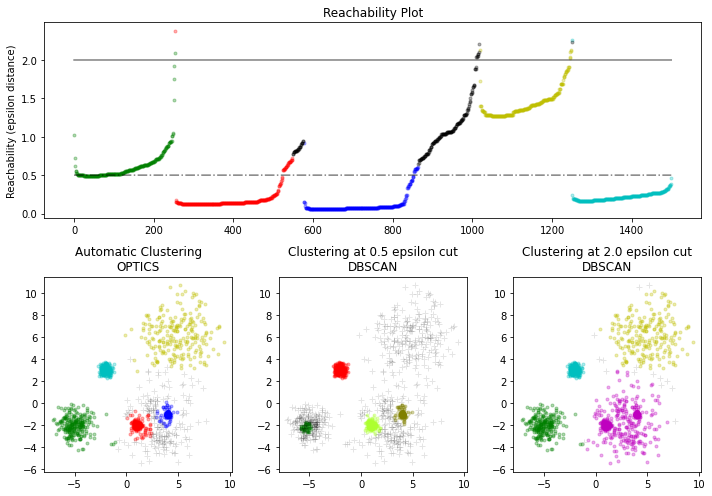

In [7]:

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

Finds core samples of high density and expands clusters from them. This example uses data that is generated so that the clusters have different densities. The OPTICS is first used with its Xi cluster detection method, and then setting specific thresholds on the reachability, which corresponds to DBSCAN. We can see that the different clusters of OPTICS’s Xi method can be recovered with different choices of thresholds in DBSCAN.

# Second example

Taken from: https://www.machinecurve.com/index.php/2020/12/15/performing-optics-clustering-with-python-and-scikit-learn/

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

In [10]:
# Generate data
X, y = make_blobs(n_samples = num_samples_total, 
                  centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)
X, y

(array([[3.46941586, 1.64185985],
        [7.65238659, 6.95338115],
        [2.62947223, 3.03000453],
        ...,
        [2.45078887, 2.81136777],
        [6.64782943, 7.53735193],
        [2.56546121, 2.77088542]]),
 array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 

In [11]:
# Compute OPTICS
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

In [12]:
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [13]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 0


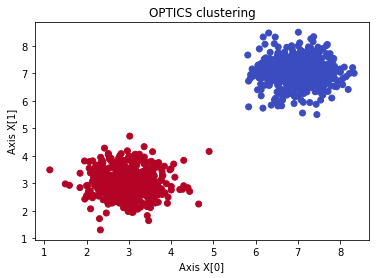

In [15]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

We can also easily generate the reachability plot:

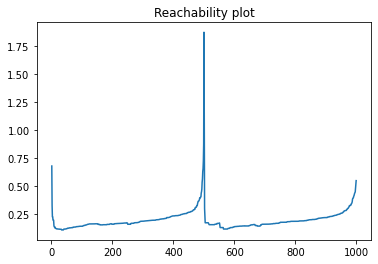

In [21]:
# Generate reachability plot
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

# Third example

Prerequisites: OPTICS Clustering

This article will demonstrate how to implement OPTICS Clustering technique using Sklearn in Python. The dataset used for the demonstration is the Mall Customer Segmentation Data which can be downloaded from Kaggle.

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [30]:
# Read the file .csv
X = pd.read_csv('Mall_Customers.csv') 
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
# Dropping irrelevant columns 
drop_features = ['CustomerID', 'Gender'] 
X = X.drop(drop_features, axis = 1) 
  
# Handling the missing values if any 
X.fillna(method ='ffill', inplace = True) 
  
X.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [32]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Renaming the columns 
X_normalized.columns = X.columns 
  
X_normalized.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


In [34]:
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(X_normalized) 

OPTICS(min_cluster_size=0.05, min_samples=10)

In [35]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 

# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 

In [36]:
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X_normalized)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[-1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5]


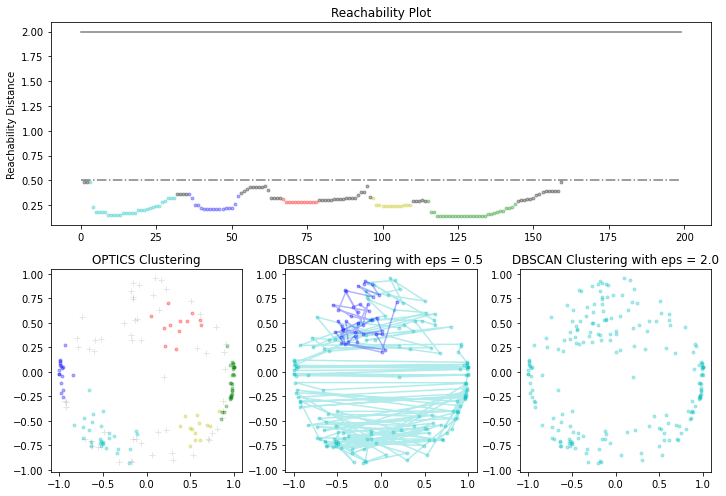

In [38]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 

# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0], 
        X_normalized.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show() 